<a href="https://colab.research.google.com/github/Gladw311/AI-for-SE/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [2]:
# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the data to understand its structure
print(f"Initial shape of training images: {x_train.shape}")
print(f"Initial shape of training labels: {y_train.shape}")

# 2. Reshape the data to include the channel dimension (1 for grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# 3. Normalize the pixel values from [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 4. One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("\n--- After Preprocessing ---")
print(f"Shape of training images: {x_train.shape}")
print(f"Shape of testing images: {x_test.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Initial shape of training images: (60000, 28, 28)
Initial shape of training labels: (60000,)

--- After Preprocessing ---
Shape of training images: (60000, 28, 28, 1)
Shape of testing images: (10000, 28, 28, 1)
Shape of training labels: (60000, 10)
Shape of testing labels: (10000, 10)


In [3]:
# Build the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps to feed into a dense layer
    Flatten(),

    # Fully Connected Classifier Layer
    Dense(128, activation='relu'),

    # Output Layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 105ms/step - accuracy: 0.8649 - loss: 0.4727 - val_accuracy: 0.9797 - val_loss: 0.0608
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9810 - loss: 0.0599 - val_accuracy: 0.9860 - val_loss: 0.0414
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.9895 - val_loss: 0.0353
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9900 - loss: 0.0309 - val_accuracy: 0.9884 - val_loss: 0.0363
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9899 - val_loss: 0.0303
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.9952 - loss: 0.0170 - val_accuracy: 0.9922 - val_loss: 0.0271
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accuracy: 0.9910 - val_loss: 0.0280
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9966 - loss: 0.

In [5]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)

print("\n--- Model Evaluation ---")
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]*100:.2f}%")

# Check if the goal is achieved
if score[1] > 0.95:
    print("\nGoal achieved: Test accuracy is over 95%!")
else:
    print("\nGoal not achieved. Consider training for more epochs or tuning the model.")


--- Model Evaluation ---
Test loss: 0.0282
Test accuracy: 99.25%

Goal achieved: Test accuracy is over 95%!


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


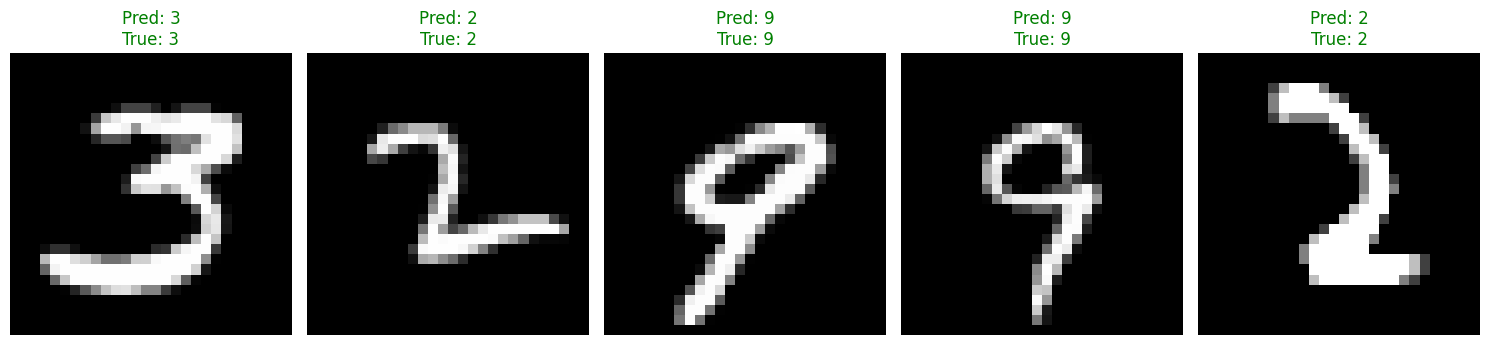

In [6]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Select 5 random images from the test set to visualize
num_samples_to_show = 5
indices = np.random.choice(range(len(x_test)), num_samples_to_show)

plt.figure(figsize=(15, 5))

for i, index in enumerate(indices):
    plt.subplot(1, num_samples_to_show, i + 1)

    # Get the image, predicted label, and true label
    image = x_test[index].reshape(28, 28)
    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(y_test[index])

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Set the title with the prediction and true label
    title_color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=title_color)

plt.tight_layout()
plt.show()